# ЛР 1 Regression

Начнем с подгрузки датасетов и модели.
Для загрузки датасетов я описал отдельные функциии. Они загружают датасеты также, как и в Preview.ipynb, только дополнительно сбрасывают индекс у получившихся DataFrame и Series

## Модель регрессии(логистической)

Моя реализация данной модели лежит в файле src.regression, я использовал стандартную вариант модели с сигмоидной функцией активации и стохастическим градиентным спуском в качестве алгоритма обучения. Из оптимизаций я использовал L2 регуляцию параметров модели и сумму квадратов  в качестве минимизируемой функции стоимости. Не использовал разбиение датасета на пакеты(mini-batches)

Min cost = 0.7259545864147149 reached at 326 iteration restored as best model state


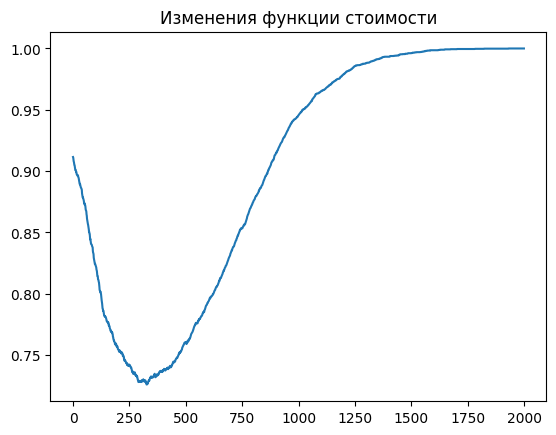

In [4]:
from src.regression import *
from src.datasets import getRegressionDataset
defaultDataset, extendedDataset = getRegressionDataset()
import matplotlib.pyplot as plt
model = Regression(defaultDataset.xTrain.shape[1], lr=1e-2, epochs=2000, lmbda=1e-4)
model.fit(defaultDataset.xTrain, defaultDataset.yTrain)

fig, ax = plt.subplots()
ax.plot(model.costs)
ax.set_title("Изменения функции стоимости")
plt.show()

Посчитаем точность предсказания на базовом наборе данных

In [5]:
from sklearn import metrics

yPredicted = model.predict(defaultDataset.xTest)
print(f"Regression accuracy: {metrics.accuracy_score(defaultDataset.yTest, yPredicted)}")

Regression accuracy: 0.8303333333333334


Посчитаем точность предсказания на расширенном наборе данных

Min cost = 0.649203800901247 reached at 660 iteration restored as best model state


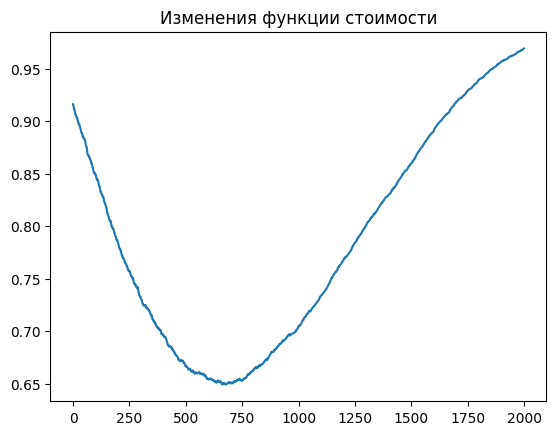

Regression accuracy: 0.8826666666666667


In [6]:
model = Regression(extendedDataset.xTrain.shape[1], lr=1e-2, epochs=2000, lmbda=1e-4)
model.fit(extendedDataset.xTrain, extendedDataset.yTrain)

fig, ax = plt.subplots()
ax.plot(model.costs)
ax.set_title("Изменения функции стоимости")
plt.show()

from sklearn import metrics

yPredicted = model.predict(extendedDataset.xTest)
print(f"Regression accuracy: {metrics.accuracy_score(extendedDataset.yTest, yPredicted)}")

# Вывод

Почти получилось достигнуть бейзлайна оригинальной реализации из sklearn, предполагаю, что там используется не градиентный метод или более оптимизированная его версия.

Введение доп признаков дало заментый прирост точности(acccuracy)